# Bike Sharing : Multiple Linear Regression

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Business Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Reading and Understanding the Data:

### Importing packages

In [2]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')

In [5]:
bikeSharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#check the details of numeriacl data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#check the shape
bikeSharing_df.shape

(730, 16)

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [77]:
#before starting of data cleaning, creating a copy of data set.
bike_dummy=bikeSharing_df.iloc[:,0:16]

In [78]:
bike_dummy.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Cleaning Data:

#### Drop columns that are not useful for analysis

- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [80]:
# Droping instant column as it is index column which has nothing to do with target
dropColList = ['instant','dteday','casual','registered']
bike_dummy = bike_dummy.drop(dropColList, axis=1)

In [81]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [82]:
#Identify Categorical Columns
data = []
for row in bike_dummy.columns.tolist():
    data.append({'column': row, 'count': len(bike_dummy[row].unique())})
cat_data = pd.DataFrame(data).sort_values('count')
cat_data

,column,count
1,yr,2
3,holiday,2
5,workingday,2
6,weathersit,3
0,season,4
4,weekday,7
2,mnth,12
7,temp,498
9,hum,594
10,windspeed,649


#### There are total 7 categorical and 5 continuos variable present in dataset

### Convert season,weathersit,mnth and weekday to categorical types:

In [83]:
bike_dummy.season.replace({1:"spring", 2:"summer", 3:"rain", 4:"winter"},inplace = True)
bike_dummy.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_dummy.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_dummy.weekday = bike_dummy.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_dummy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis(EDA)

### Visualising the Data to find the Correlation between the Continuous Variable and target variable

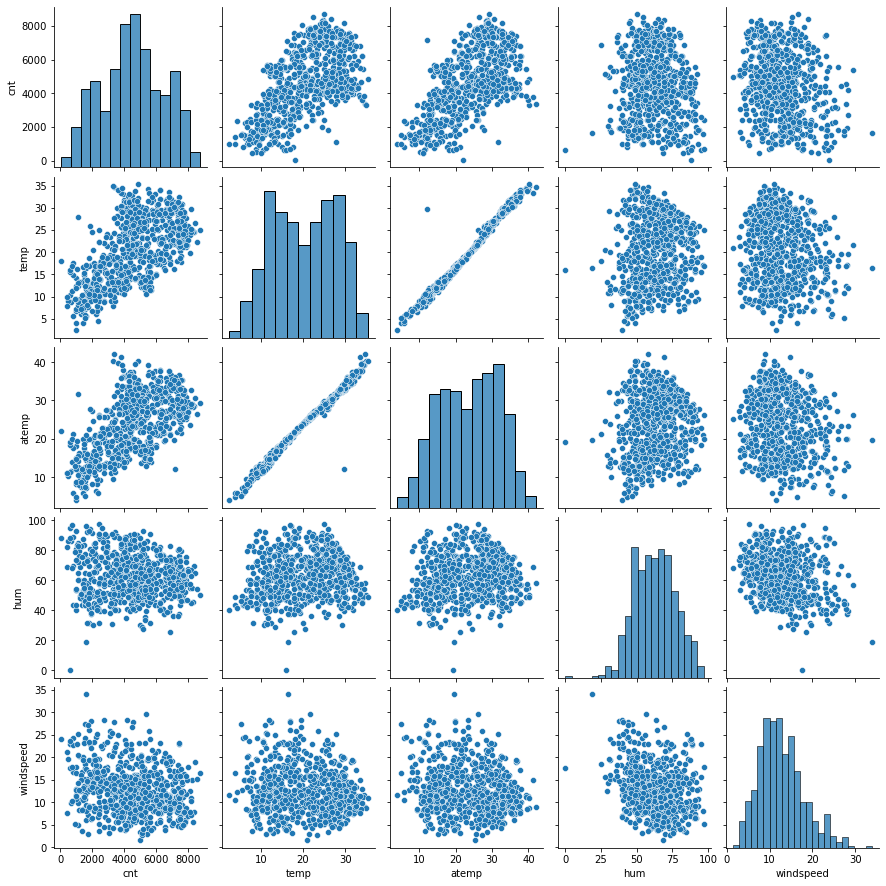

In [84]:
#Draw pairplots for continuous numeric variables using seaborn
sns.pairplot(data=bike_dummy,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.
- Looks like temp and atemp are highly correlated with each other

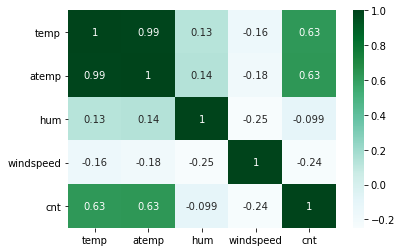

In [85]:
# Checking continuous variables relationship with each other using heatmap
sns.heatmap(bike_dummy[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [86]:
# Droping atemp column as it is highly correlated with temp
bike_dummy.drop(['atemp'], axis = 1, inplace = True)

In [87]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Heatmap of correlation between numerical variables

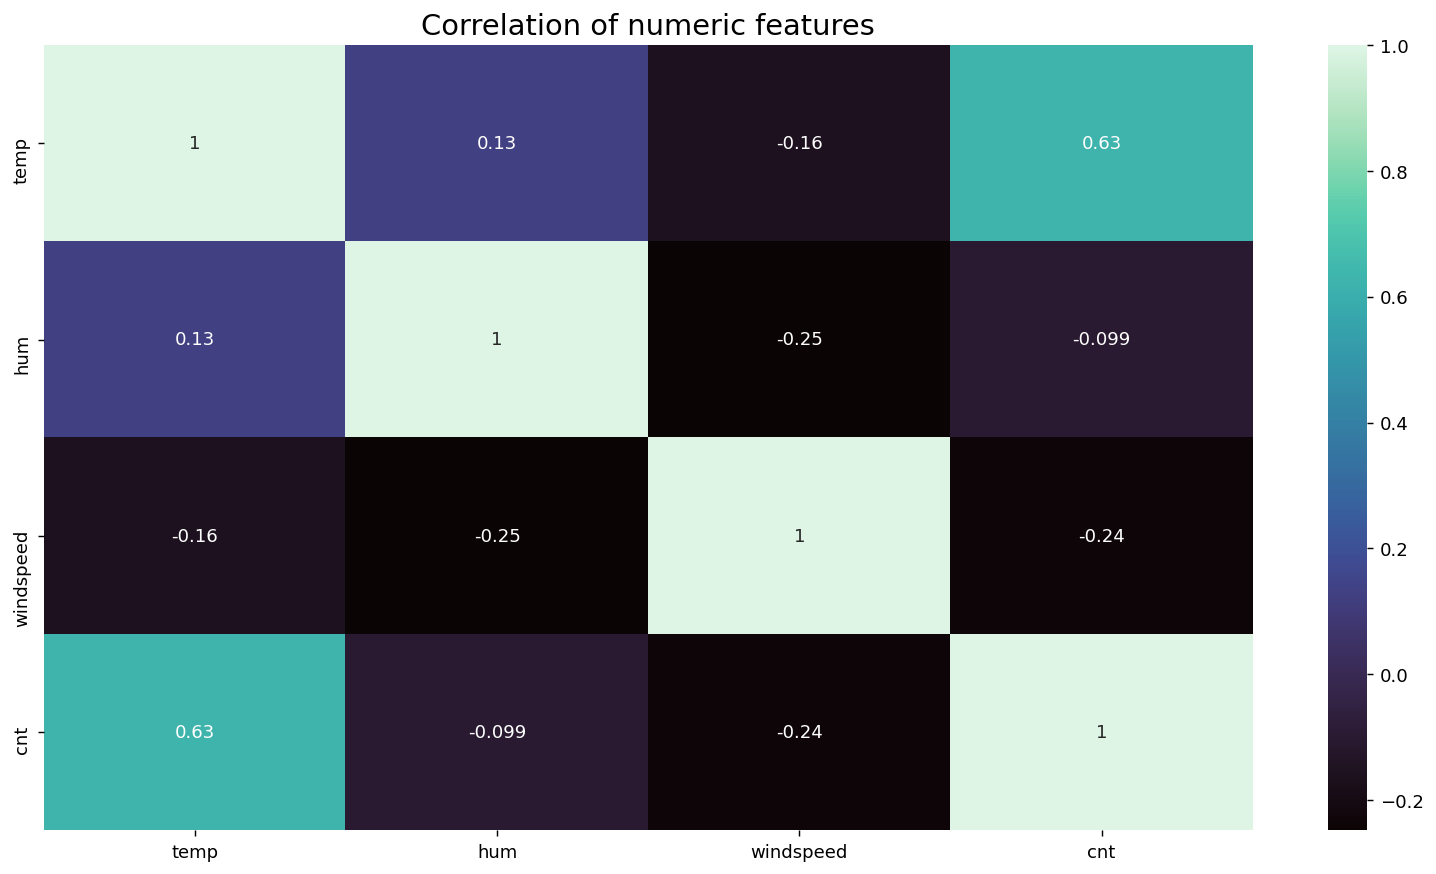

In [88]:
data = ["temp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike_dummy[data].corr(),annot= True,cmap="mako")
plt.show()

#### From heatmap, we can see target variable has a linear relationship with some of the independent variables. Good sign for building a linear regression Model.

### Analysing Categorical Variabels with target variables

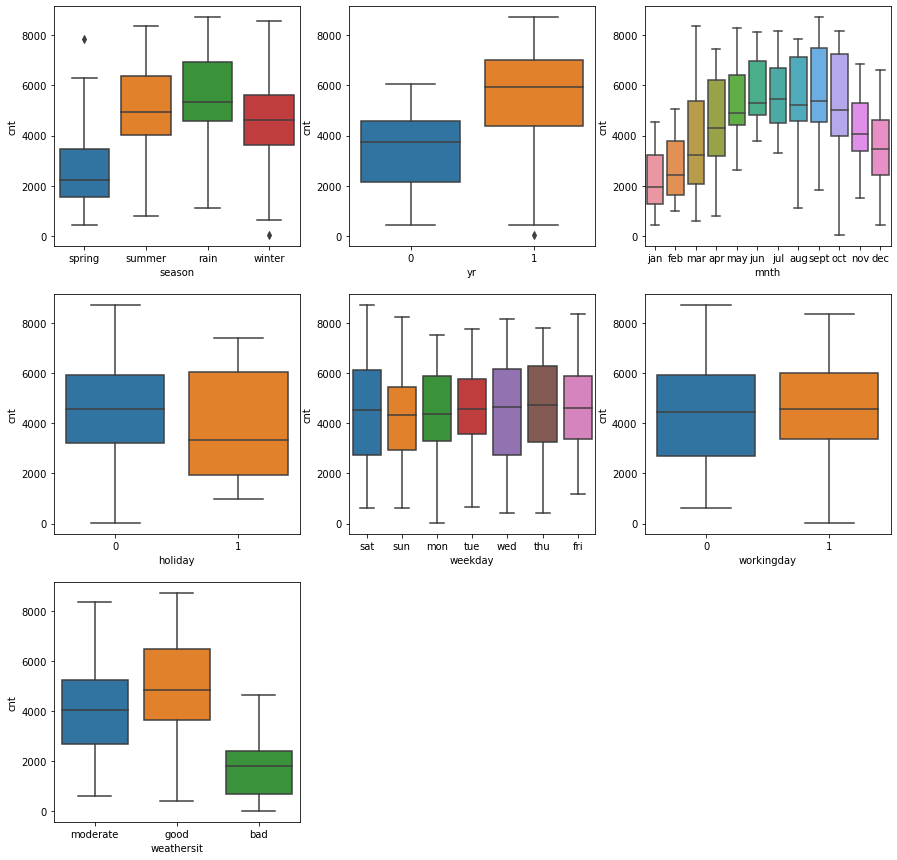

In [89]:
# Boxplot for categorical variables to see demands
cat_list = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_list):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_dummy, x=i[1], y='cnt')
plt.show()

Insights:
1. Season: 3:rain has highest demand for rental bikes
2. Demand has increased compare to previous year.
3. When there is a holiday, demand has decreased.
4. The clear weathershit has highest demand.
5. Demand is continuously growing each month till June.During September, bike sharing is more. During the year end and beginning, it is less.

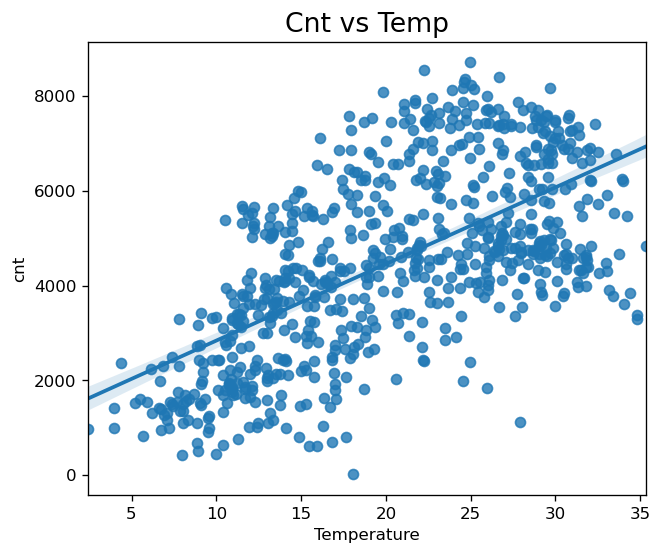

In [91]:
plt.figure(figsize=(6,5),dpi=120)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_dummy,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

- Demand for bikes is positively correlated to temp.
- We can see that target variable(cnt) is linearly increasing with temp indicating linear relation.

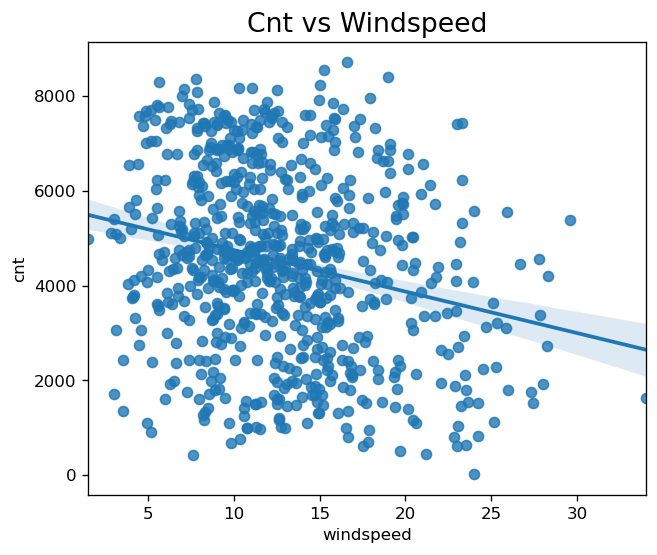

In [92]:
plt.figure(figsize=(6,5),dpi=120)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_dummy,y="cnt",x="windspeed")
plt.show()

- We can see target variable(cnt) is linearly decreasing with increase in windspeed.

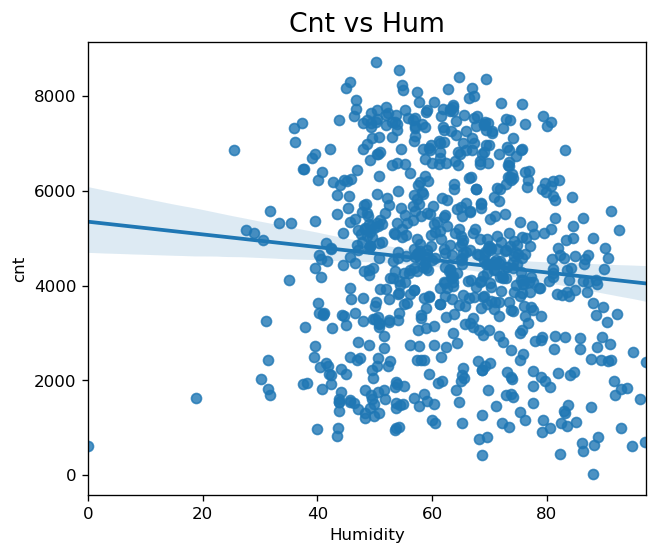

In [93]:
plt.figure(figsize=(6,5),dpi=120)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_dummy,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

- We can see target variable(cnt) is linearly decreasing increase in humidity.

### Creating Dummy Variables for all categorical variables

In [94]:
bike_dummy = pd.get_dummies(data=bike_dummy,columns=["season","mnth","weekday"],drop_first=True)
bike_dummy = pd.get_dummies(data=bike_dummy,columns=["weathersit"])

In [113]:
#Print columns after creating dummies
bike_dummy.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [96]:
bike_dummy.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### Split Data into training and test

In [97]:
#popping out target variable into variable "y"
y=bike_dummy.pop('cnt')

#our dataset has remaining variable with all our independent variables,copying dataset in variable "X"
X=bike_dummy

np.random.seed(0)
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state=1)

In [98]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 29)
(219, 29)


### Feature Scaling for all continuous variables(temp,hum,windspeed)

In [99]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [100]:
#Continuos variables
num_vars = ['temp','hum','windspeed']
#Use Normalized scaler to scale training dataset
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [101]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
589,1,0,1,0.837559,0.405453,0.271536,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
135,0,0,1,0.656134,0.743040,0.249252,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
626,1,0,1,0.624490,0.393272,0.459915,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
554,1,0,1,0.824902,0.597447,0.378326,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
311,0,0,1,0.442008,0.650812,0.111281,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


### Model Build using RFE and Automated approach

RFE(Recursive feature elimination) : We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [102]:
# Build a Lienar Regression model using SKLearn for RFE
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', False, 3),
 ('mnth_aug', False, 14),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 5),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 7),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [114]:
#taking feature selected by rfe for model building
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 589 to 235
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   hum                  510 non-null    float64
 5   windspeed            510 non-null    float64
 6   season_spring        510 non-null    uint8  
 7   season_summer        510 non-null    uint8  
 8   season_winter        510 non-null    uint8  
 9   mnth_jan             510 non-null    uint8  
 10  mnth_jul             510 non-null    uint8  
 11  mnth_sept            510 non-null    uint8  
 12  weekday_sat          510 non-null    uint8  
 13  weathersit_bad       510 non-null    uint8  
 14  weathersit_moderate  510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(9)
memo

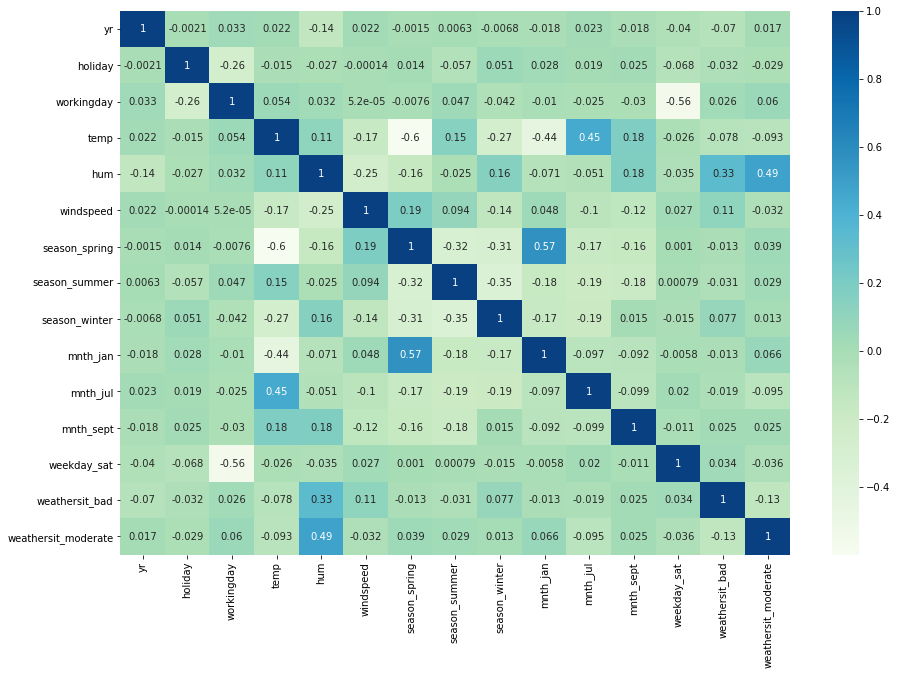

In [115]:
# Checking correlation of columns selected by RFE with respect to target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(X_train_rfe.corr(), cmap='GnBu', annot=True)
plt.show()

In [107]:
#defining a function to build a model using statsmodel api - It takes the list of columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [118]:
#defining a function to calculate VIFs and print them -It takes the list of columns to be selected for model as a parameter
def get_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1 - Start with all variables selected by RFE

In [119]:
#Selected columns for Model 1 - all columns selected by RFE
cols = X_train_rfe.columns
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     159.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.84e-178
Time:                        22:00:46   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     494   BIC:                             8347.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2067.2775    

### Model 2

In [120]:
# Dropping the variable mnth_jan as it is insignificant because it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          9.91e-179
Time:                        22:00:58   Log-Likelihood:                -4125.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     495   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1970.0231    

### Model 3

In [121]:
#Removing the variable 'hum' based on its Very High 'VIF' value.
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     174.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.05e-175
Time:                        22:03:05   Log-Likelihood:                -4136.2
No. Observations:                 510   AIC:                             8300.
Df Residuals:                     496   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1516.8552    

### Model 4

In [127]:
#Removing the variable 'holiday' and 'mnth_jul' as it has high p value.
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.75e-176
Time:                        22:17:51   Log-Likelihood:                -4139.2
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1411.5279    

### Model 5

In [128]:
#Removing the variable 'workingday' as it has high VIF value.
cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     215.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          9.16e-174
Time:                        22:19:28   Log-Likelihood:                -4148.0
No. Observations:                 510   AIC:                             8318.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1675.1712    

### Model 6

In [130]:
# Replacing windspeed with spring as windspeed is highly correlated with temp
cols = ['yr', 'temp', 'season_spring', 'mnth_jul','season_summer',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.75e-169
Time:                        22:19:55   Log-Likelihood:                -4159.1
No. Observations:                 510   AIC:                             8340.
Df Residuals:                     499   BIC:                             8387.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1438.1796    

### Model 7

In [131]:
# Removing season_summer as it has high VIF value
cols = ['yr', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          6.82e-169
Time:                        22:20:59   Log-Likelihood:                -4162.3
No. Observations:                 510   AIC:                             8345.
Df Residuals:                     500   BIC:                             8387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1851.2506    

#### Insights:

- This model looks good, as there seems to be very low multicollinearity between the predictors,the p-values for all the predictors seems to be significant(p-value for all the features is almost 0.0) and R2 is 0.801. Here VIF alos, seems to be almost accepted. Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [133]:
#With above features, build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr1 = LinearRegression()
lr1.fit(X_train[cols],y_train)
print(lr1.intercept_,lr1.coef_)

1851.2506394721868 [ 2077.6603167  -1064.33746973  -440.01369407   339.62097249
   527.97971432  -339.7768987  -2584.5247335   -569.02521653
  3811.61651848]


### Residual Analysis

In [134]:
y_train_pred = lr1.predict(X_train[cols])

Text(0.5, 0, 'Errors')

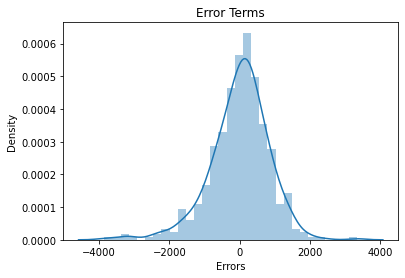

In [135]:
#histogram for error
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

- Error terms are normally distributed with mean zero

In [136]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8007877901754661

#### R2 is same as compared to our final model

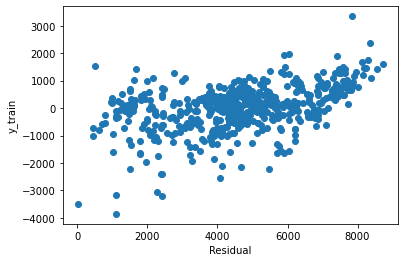

In [138]:
# scatter plot
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set using final model

In [142]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
248,0,0,1,0.608667,0.880915,0.767112,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
298,0,0,1,0.537996,0.649072,0.301190,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
159,0,0,1,0.948314,0.437354,0.304151,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
660,1,0,1,0.613942,0.539443,0.172135,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
511,1,0,0,0.798532,0.616589,0.459906,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [144]:
#Scale continuos variables in X_test
num_vars = ['temp','hum','windspeed']
#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
248,0,0,1,-0.076576,-0.358584,-0.054348,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
298,0,0,1,-0.076643,-0.358629,-0.054939,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
159,0,0,1,-0.076252,-0.358670,-0.054935,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
660,1,0,1,-0.076571,-0.358650,-0.055103,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
511,1,0,0,-0.076395,-0.358635,-0.054738,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [160]:
#With above features(from the finalmodel) using sklearn build model for test data
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr1 = LinearRegression()
lr1.fit(X_test[cols],y_test)

LinearRegression()

In [161]:
#Predict the values for test data
y_test_pred = lr1.predict(X_test[cols])

In [164]:
# R squared value between test and predicted test data sets.  
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.867040338824975


- R2 value for predictions on test data (0.867) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

In [166]:
n = X_test.shape[0]
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

0.8466391209727224


Text(0, 0.5, 'y_test_pred')

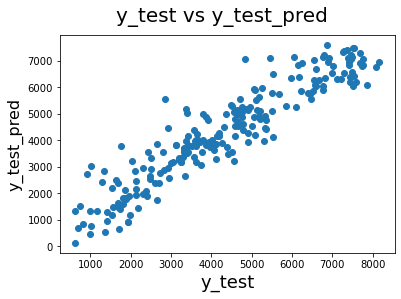

In [169]:
# Plotting y_test and predicted y_test
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions.

### FinalModel

In [175]:
cols = ['yr', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          6.82e-169
Time:                        23:06:20   Log-Likelihood:                -4162.3
No. Observations:                 510   AIC:                             8345.
Df Residuals:                     500   BIC:                             8387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1851.2506    

In [176]:
#With above features, build the finalmodel using sklearn and print coeffient and intercept
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr1 = LinearRegression()
lr1.fit(X_train[cols],y_train)
print(lr1.intercept_,lr1.coef_)

1851.2506394721868 [ 2077.6603167  -1064.33746973  -440.01369407   339.62097249
   527.97971432  -339.7768987  -2584.5247335   -569.02521653
  3811.61651848]


### Final Model Interpretation

- Company should focus on expanding business during Spring season and september month .
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rainy season

## Hence when the situation comes back to normal, the company should bring some new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

Conclusion:
<br>Significant variables to predict the demand for shared bikes:

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersit(Light Snow, Mist + Cloudy)